# Deep learning - convolution neural net

A simple demonstration of deep learning using a convolutional neural net (CNN) to classify images.

For most practical applications we would ideally use a pre-trained CNN with a proven good performance and just do some fine tuning for our specific task. However, I'm going to build a simple CNN from scratch for learning purposes.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import numpy as np
import math
import matplotlib.pyplot as plt

print('Tensorflow', tf.__version__)

Tensorflow 2.1.0


## Load data
We're going to use the [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, citation:

> Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747

In [2]:
data = fashion_mnist
(x_train, y_train), (x_test, y_test) = data.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


We have 60,000 train examples and 10,000 test examples, each a 28x28 image.

Class labels (`y_*`) are
```
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
```

In [3]:
labels_dict = {0:'T-shirt/top',
               1:'Trouser',
               2:'Pullover',
               3:'Dress',
               4:'Coat',
               5:'Sandal',
               6:'Shirt',
               7:'Sneaker',
               8:'Bag',
               9:'Ankle boot'}

## Display some data

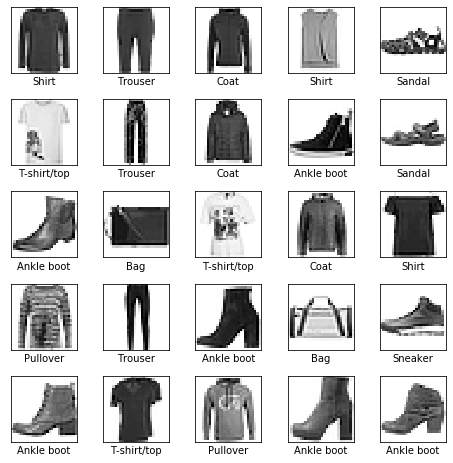

In [4]:
# Display some random, labelled images
n_train = x_train.shape[0] # number of training examples
n_images = 25 # number of images to display
display_rows = math.floor(math.sqrt(n_images))
display_cols = math.ceil(n_images / display_rows)

# Select n_images random images
rand_sel = np.random.randint(low=0, high=n_train, size=n_images)

plt.figure(figsize=(8, 8))
for i in range(n_images):
    image = x_train[rand_sel[i]]
    plt.subplot(display_rows, display_cols, i+1)
    plt.imshow(image, cmap='Greys')
    plt.xlabel(labels_dict[y_train[rand_sel[i]]])
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(hspace=0.4)
plt.show()

## Process data

For this relatively simple example, all we need to do is normalise the pixel values.

In [5]:
max_val = np.max(x_train)
print(max_val)
x_train = x_train / max_val
x_test = x_test / max_val
print(np.max(x_train))

255
1.0


## Define neural net

In [6]:
image_shape = (x_train.shape[1], x_train.shape[2], 1) # (28, 28, 1)
n_classes = len(set(y_train)) # 10

In [7]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), strides=(1, 1),
           padding='same', activation='relu', input_shape=image_shape),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1),
           padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dense(units=n_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                100416    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

**Explanation of the model summary:**
* The first element in `Output Shape` is the batch size. We're not using batches, hence we get `None`.

* `conv2d` has 16 filters, each 3x3 in size. Each filter also has a bias weight. So the total parameters for this layer are `16*(3*3 + 1) = 160`.

* `conv2d_1` has 32 filters *for each layer of input*. There are 16 layers of input, i.e. a total of `32*16 = 512` filters. Each filter has size 3x3, giving `512 * 3*3= 4608` parameters. Then we have the bias weight for each filter

* For the dense layers, it's just `(input + 1)*units`, e.g. `(1568+1)*64 = 100416`, `(64+1)*10 = 650.`